# Highfield Street Circuit lap time simulation
This Jupyter notebook shows you how to use the function <code>simulator([cl, cd],plotting)</code> to simulate the lap time of a car with a given $C_LA$ and $C_DA$ (in the array <code>[clA, cdA]</code> - these are the lift and drag coefficient multiplied by the reference area or, more simply, the lift and drag divided by the dynamic pressure) around the Highfield Street Circuit. A speed vs. time plot can be produced by setting <code>plotting = 1</code>.

First we use the command below so that plots appear inline with the Notebook:

In [1]:
%matplotlib inline

Now import the <code>simulator</code> function from the <code>lapsim</code> module (You need to download <code>lapsim.pyc</code> from Blackboard):

In [2]:
from lapsim import simulator

You'll need to estimate the lift and drag coefficent of your race-car wing, e.g. using SolidWorks or wind tunnel data. Here we'll try out the simulator using $C_LA=1.2$ and $C_DA=0.5$. We'll also set the plotting input argument to 1, so that we get the plot: 

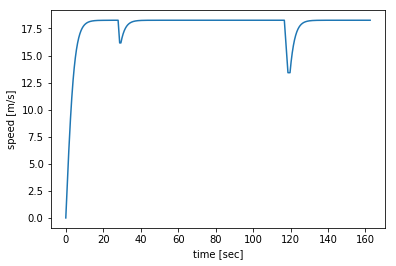

162.53159162316007

In [33]:
clA = 1.2
cdA = 0.5
simulator([clA, cdA], 1)

Try changing the values of $C_LA$ and $C_DA$. Note how a low $C_D$ means that the car accelerates more quickly and has a higher potential top speed, but that a high $C_LA$ is needed to give grip and higher speed round the corners.

## Surface plot of lap time
Rather than trial and error to see which values of $C_LA$ and $C_DA$ give the best lap time, we could plot out the lap time for a range of values. We'll need to first create an array of $C_LA$ and $C_DA$ values:

In [4]:
import numpy as np
res = 11 #resolution of plot we'll produce (11x11)
clA = np.linspace(0, 1.0, res)
cdA = np.linspace(0.1, 0.5, res)

and then a matrix of lap times corresponding to all combinations of these values: 

In [5]:
time = np.zeros([res,res])
for i in range(0,res):
    for j in range(0,res):
        time[i, j] = simulator([clA[j], cdA[i]], 0)

For a surface plot, we actually need matrices of $C_LA$ and $C_DA$ values corresponding the the time values. This can be created using Numpy's <code>meshgrid</code> function:

In [6]:
CLA, CDA = np.meshgrid(clA, cdA)

The code below creates the surface plot.

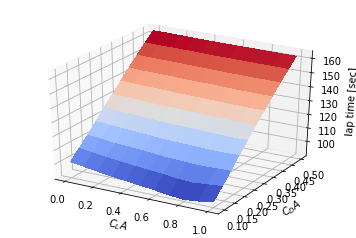

In [7]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(CLA, CDA, time, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$C_LA$')
ax.set_ylabel('$C_DA$')
ax.set_zlabel('lap time [sec]')
plt.savefig('laptime.png')

Now we can see roughly where the best lap time is: $C_DA$ needs to be as low as possible, while $C_LA$ should be around 0.7 to 0.9. It would be good to get a more accurate result though. We could zoom in on this region, or use an optimizer. 

## Optimization
We'll first try optimizing a simple function, $\sum_i^n x^2_i$, the code for which is below:

In [8]:
def squared(x):
    y = np.sum(np.square(x))
    return y

Of course the minimum of this function is at $\mathbf{x}=\{0,0,...0\}$. The vector $x$ could be of any length $n$. Below we'll try calling the function for $x = \{0,0\}$:

In [9]:
x=np.array([0.0, 0.0])
squared(x)

0.0

We should be able to find this result using an optimzer. We'll use Scipy.optimize's <code>minimize</code> function, and in particular the 'BFGS' optimizer. We pass to this optimizer the name of our funtion (<code>squared</code>) and a start point $x^{(0)} = \{2,2\}$:

In [10]:
from scipy.optimize import minimize
x0 = np.array([2.0, 2.0])
opt_out=minimize(squared,x0,method='BFGS')
print(opt_out)

      fun: 4.5280935126791136e-15
 hess_inv: array([[ 0.75000001, -0.24999999],
       [-0.24999999,  0.75000001]])
      jac: array([ -8.02628395e-08,  -8.02628395e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ -4.75820003e-08,  -4.75820003e-08])


The optimizer has found the minimum succesfully, with <code>opt_out.x</code> and <code>opt_out.fun</code> both very close to zeros.

Let's make things a bit more complicated by introducing bounds to out problem: $0<x_1<5$, $0.15<x_1<5$. We'll also assume that the function might have some 'noise' in the output, so we'll set the minimum finite difference for approximating the gradient in the function (<code>eps</code>) to be 0.001. For a bounded search we use the <code>L-BFGS-B</code> method:

In [11]:
limits=((0.0, 5.0),(0.15, 5.0))
opt_out=minimize(squared,x0,method='L-BFGS-B', bounds = limits, options={'eps':0.001})
print(opt_out)

      fun: 0.022499999999999999
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.001,  0.301])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 1
   status: 0
  success: True
        x: array([ 0.  ,  0.15])


## Optimizing the lap time
Based on what you've learnt from the above examples, find the optimium values for $C_LA$ and $C_DA$ to minimize the lap time. Clearly you can't make a wing with zero drag! Use limits of $0<C_LA<1.5$, $0.1<C_DA<0.5$ and again <code>'eps':0.01</code>. Because <code>simulator</code> has an extra argument (<code>plotting</code>), you'll need to include an extra argument when calling <code>minimize</code>. Use <code>args=([0])</code> (zero because you don't want to plot the lap time when running the optimizer). In the cell below replace 

<code># YOUR CODE HERE
raise NotImplementedError()</code>

with your own code.

In [21]:
cll=((0.0, 1.5),(0.1, 0.5))
opt_out = minimize(simulator,np.array([0.5, 0.5]),method='L-BFGS-B',args=([0]), bounds = cll, options={'eps':0.001})
print(opt_out)

      fun: 90.448549093740667
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 102.63161364,  371.90127153])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 354
      nit: 7
   status: 2
  success: False
        x: array([ 0.77460119,  0.1       ])


Now run the lap time simulator, but this time plot the speed/time curve:

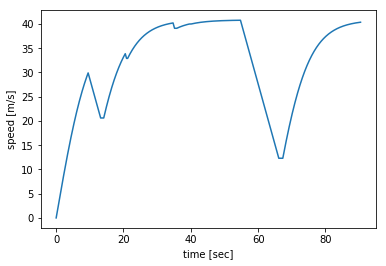

90.448558496181903

In [22]:
simulator(opt_out.x, 1)

In [23]:
"""Check that optimizer returns correct result"""
assert np.allclose(opt_out.fun, 90.45, 0.01)

Restart the kernel and run all (click "Kernel", "Restart & Run All"), to make sure everything is working before submitting this .ipynb file via Blackboard.